----------------------------------------------
Import dataset and necessary libraries
----------------------------------------------
----------------------------------------------

In [8]:
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
from scipy.stats import loguniform
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

df_heart = pd.read_csv("heart.csv")

print(f"Number of columns: {df_heart.shape[1]}")
print(f"Number of rows: {df_heart.shape[0]}")

pd.set_option('display.width', 1000)
print(df_heart.head())

Number of columns: 14
Number of rows: 1025
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3    0.23
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3    0.37
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3    0.24
3   61    1   0       148   203    0        1      161      0      0.0      2   1     3    0.28
4   62    0   0       138   294    1        1      106      0      1.9      1   3     2    0.21


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


----------------------------------------------
Verifying data types
----------------------------------------------
----------------------------------------------

In [9]:
print("Data Types:")
print(df_heart.info())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB
None


----------------------------------------------
Mapping the target variable to the classification model
----------------------------------------------
----------------------------------------------

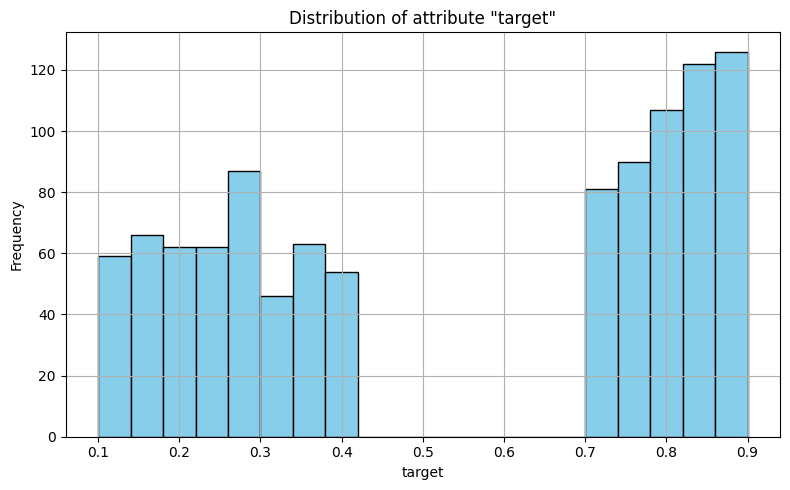

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
829   54    1   0       124   266    0        0      109      1      2.2      1   1     3     0.0
483   35    1   1       122   192    0        1      174      0      0.0      2   0     2     1.0
592   70    1   2       160   269    0        1      112      1      2.9      1   1     3     0.0
327   57    1   0       150   276    0        0      112      1      0.6      1   1     1     0.0
882   57    1   0       130   131    0        1      115      1      1.2      1   1     3     0.0


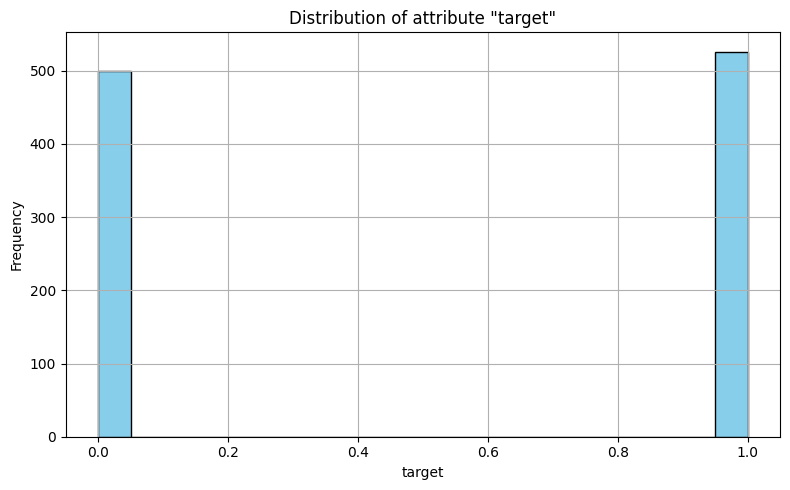

In [10]:
attribute = 'target'

plt.figure(figsize=(8, 5))
plt.hist(df_heart[attribute], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of attribute "{attribute}"')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert the 'target' column to 0 and 1 values based on the condition
df_heart.loc[:, 'target'] = np.where(df_heart['target'] > 0.5, 1, 0)

print(df_heart.sample(5))

plt.figure(figsize=(8, 5))
plt.hist(df_heart[attribute], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of attribute "{attribute}"')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------------------
Distribution of attributes
----------------------------------------------
----------------------------------------------

Original distributions:


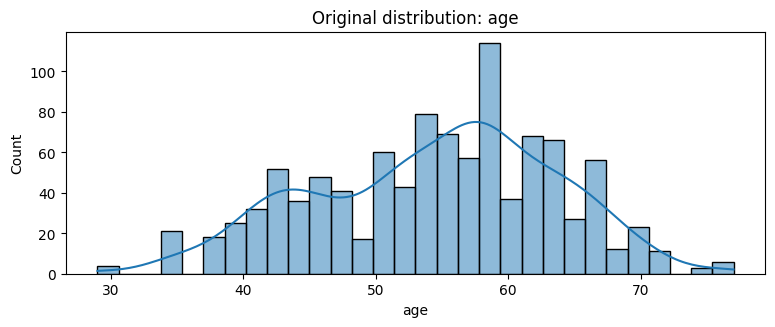

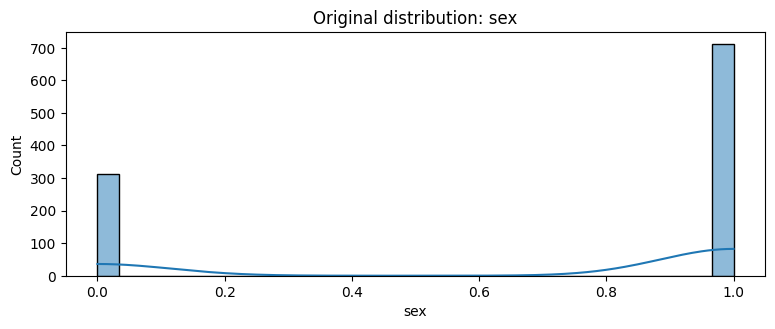

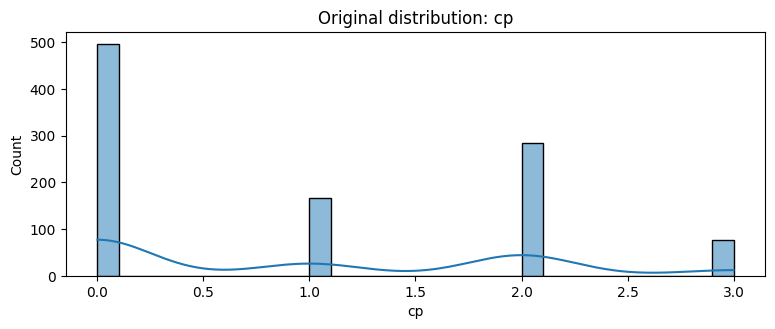

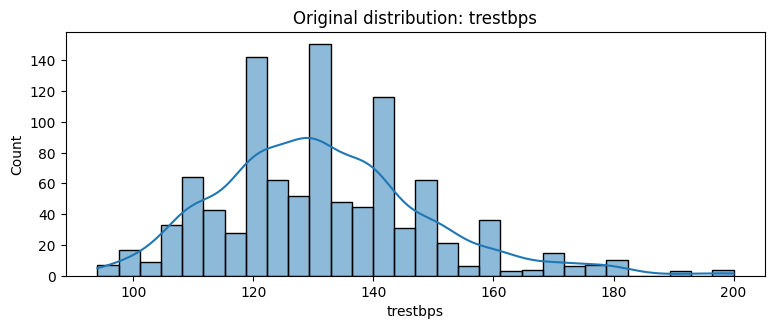

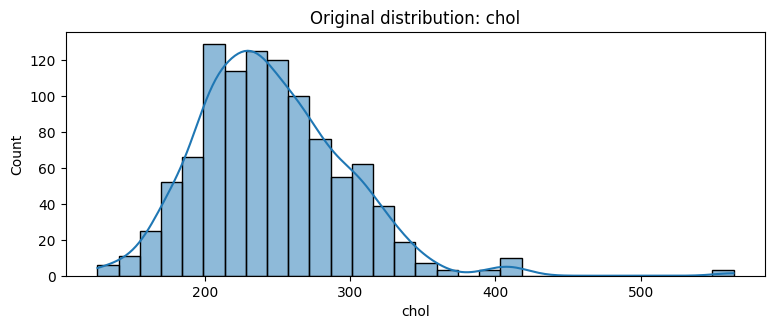

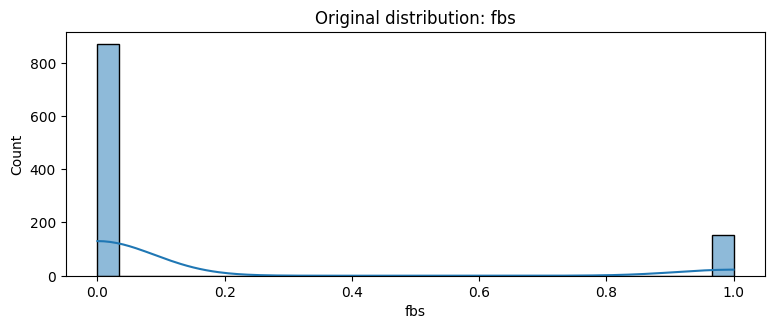

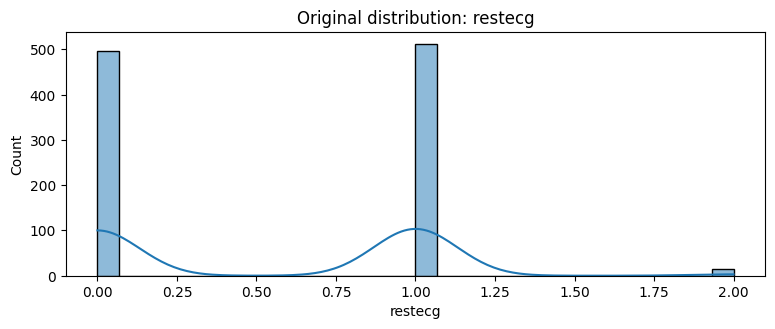

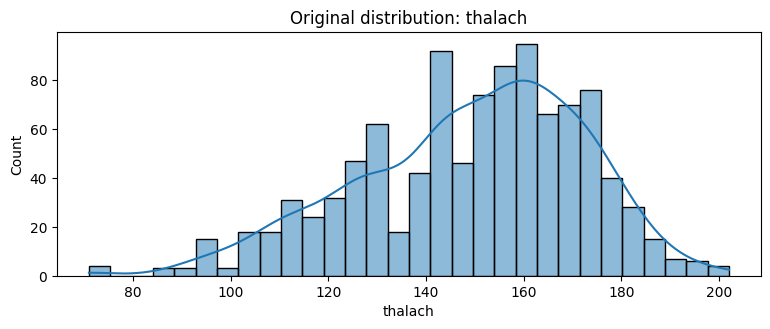

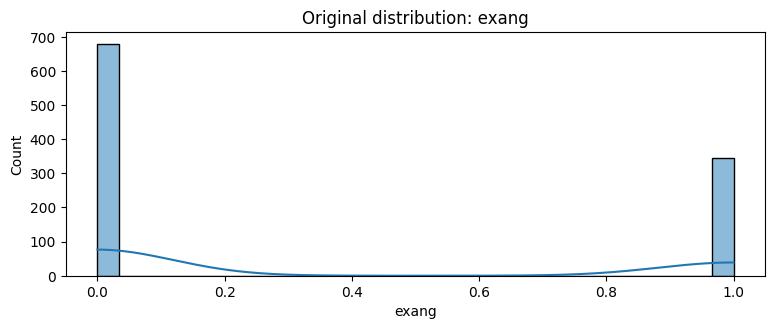

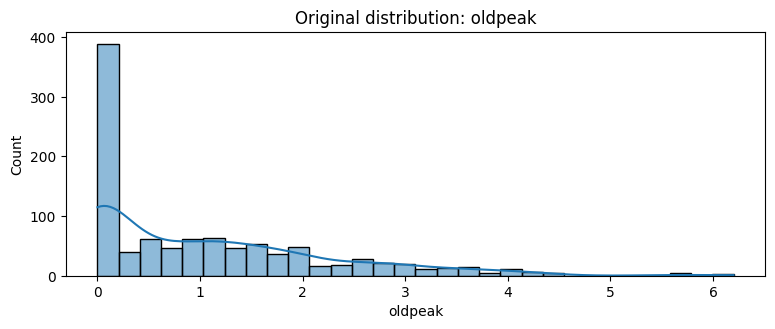

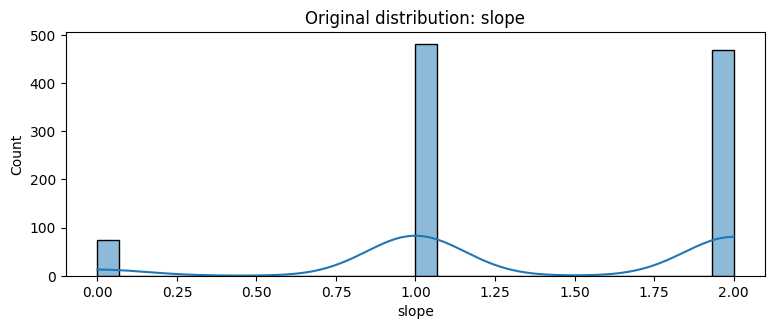

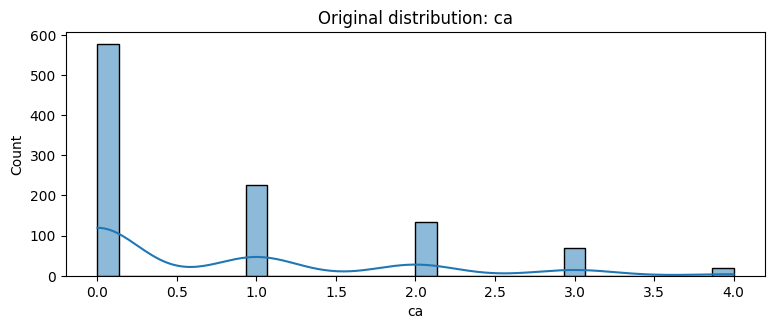

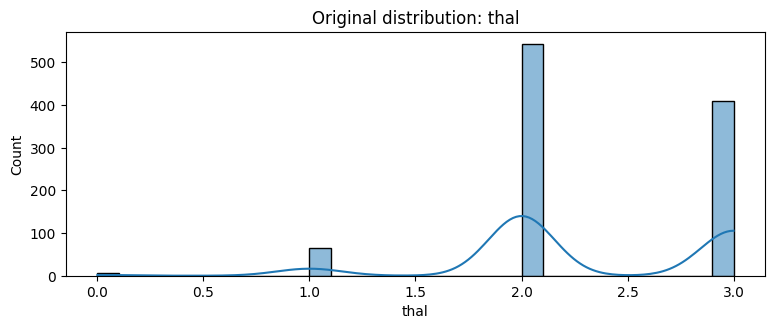

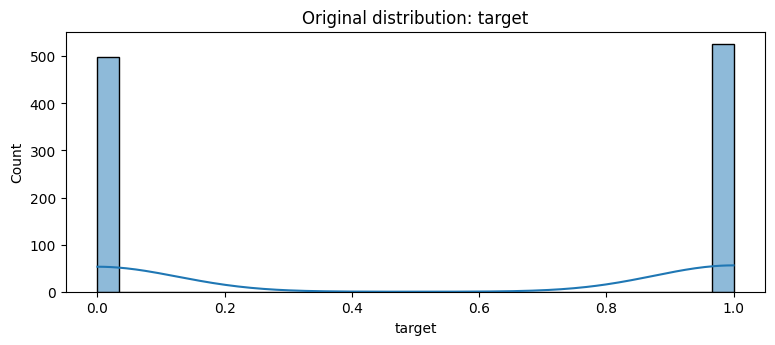

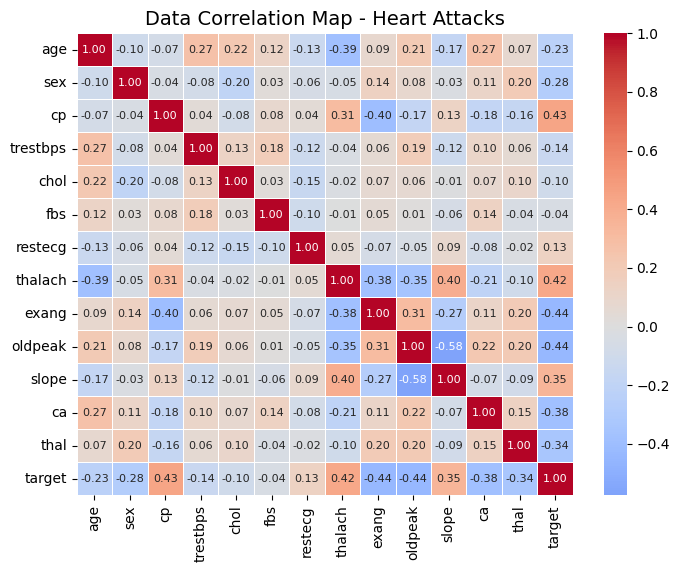

In [11]:
# Filter only numeric columns
numeric_cols = df_heart.select_dtypes(include=[np.number]).columns.tolist()

# Plot the original distributions
print("Original distributions:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart[col], kde=True, bins=30)
    plt.title(f'Original distribution: {col}')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Heart Attacks", fontsize=14)
plt.show()

----------------------------------------------
Attribute transformations
----------------------------------------------
----------------------------------------------

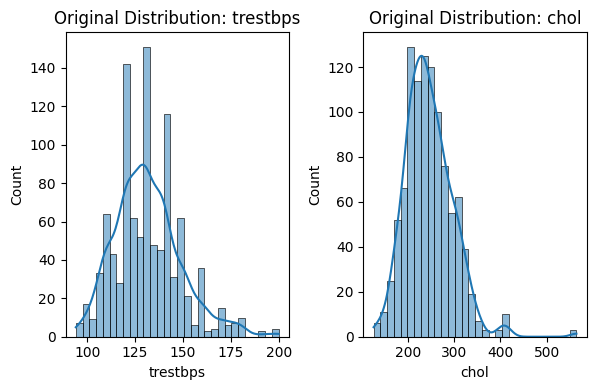

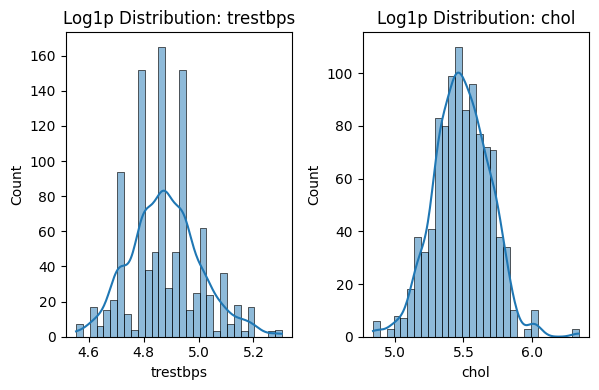

In [12]:
# Columns to transform
cols_log = ['trestbps', 'chol']

# Plot original distributions
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart[col], kde=True, bins=30)
    plt.title(f'Original Distribution: {col}')
plt.tight_layout()
plt.show()

# Apply logarithmic transformation
df_heart_d_log = df_heart.copy()
for col in cols_log:
    df_heart_d_log[col] = np.log1p(df_heart_d_log[col])

# Plot distributions after log1p
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_d_log[col], kde=True, bins=30)
    plt.title(f'Log1p Distribution: {col}')
plt.tight_layout()
plt.show()

----------------------------------------------
Distributions after transformations
----------------------------------------------
----------------------------------------------

Distribuciones finales:


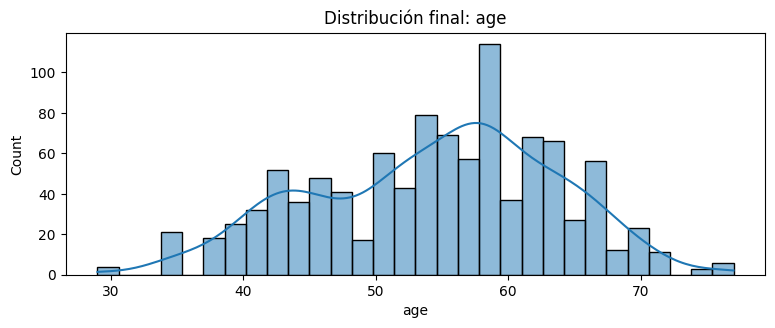

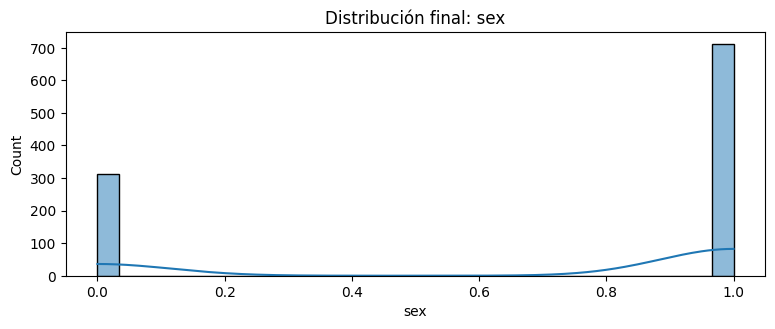

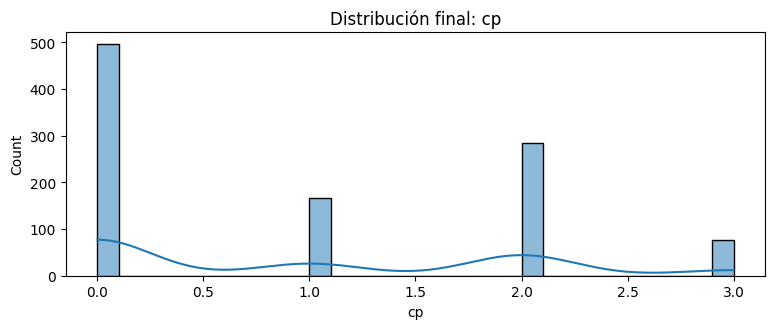

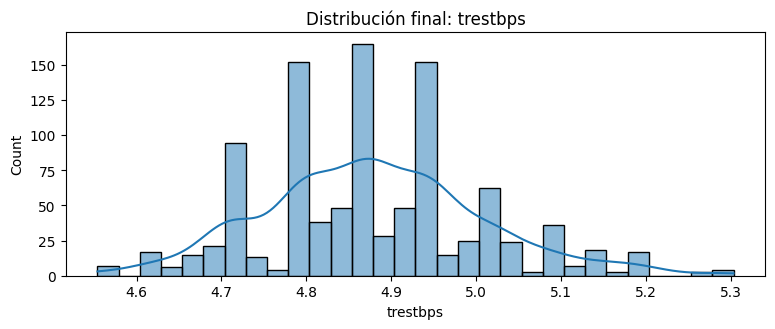

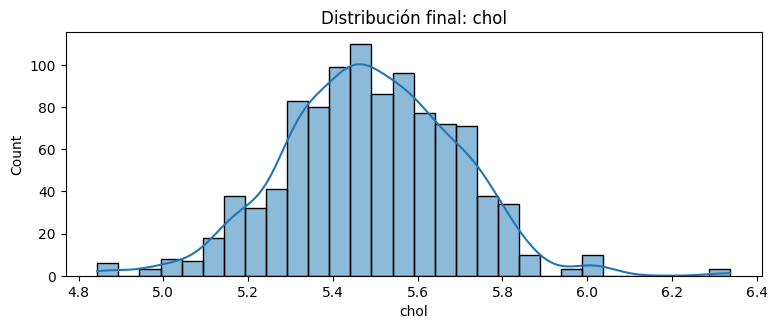

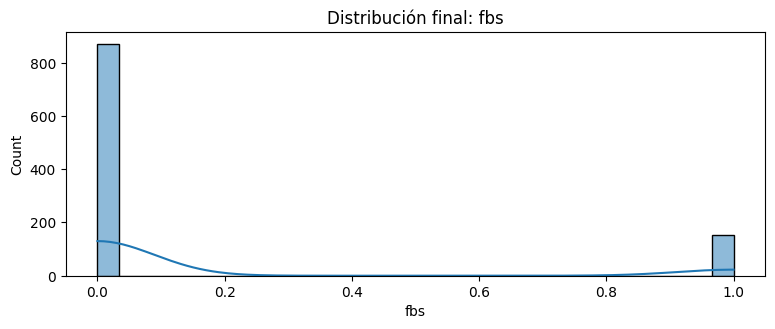

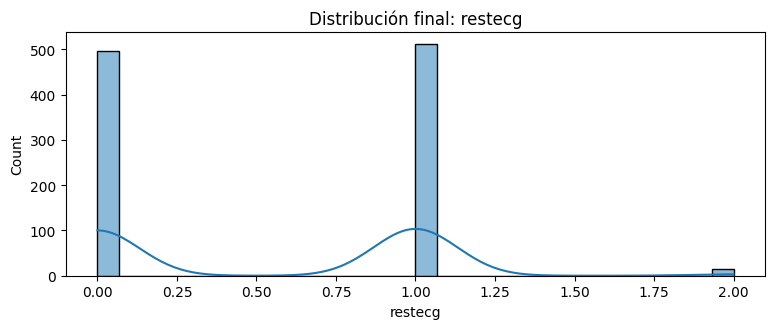

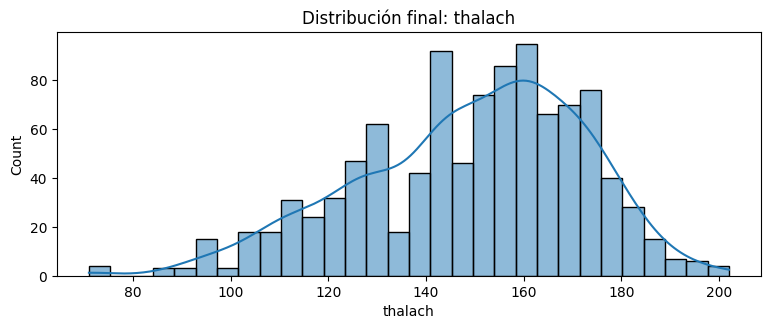

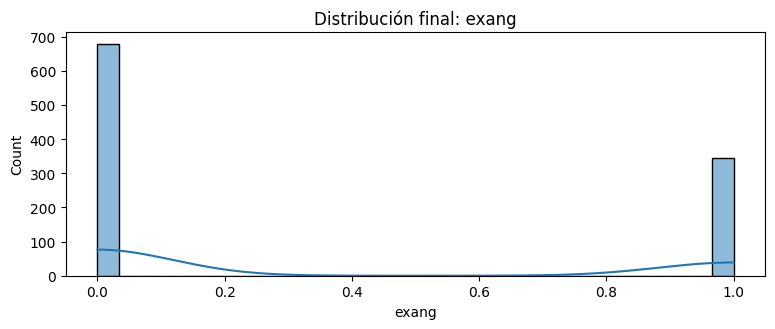

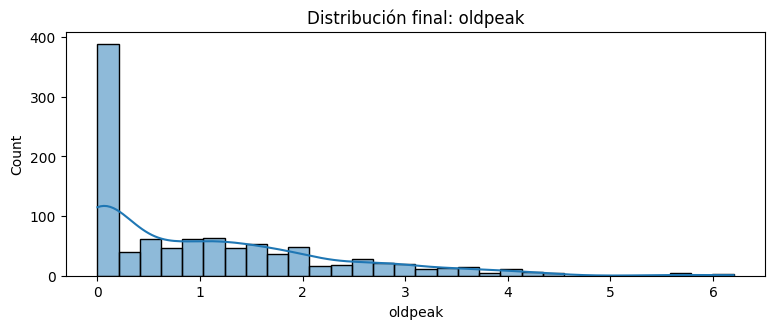

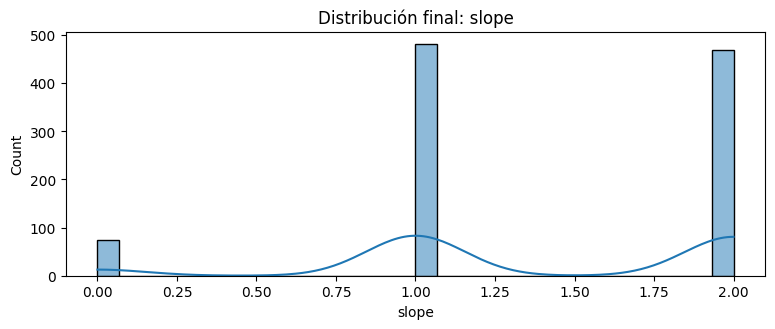

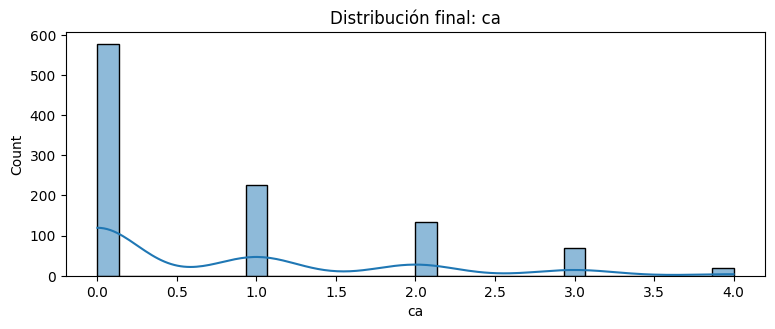

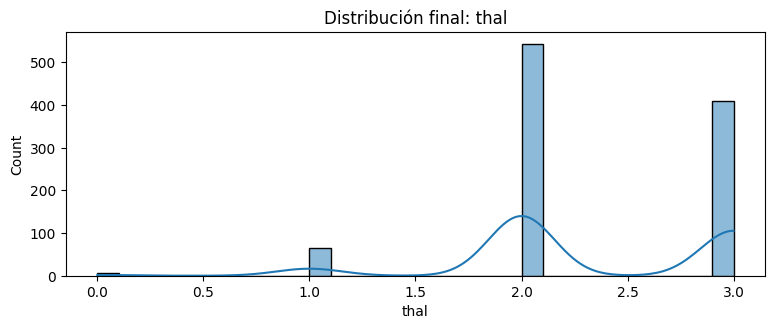

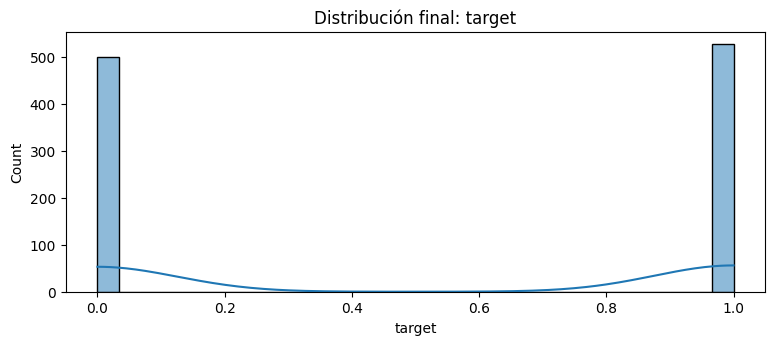

In [13]:
# Graficar las distribuciones despues de transformaciones
print("Distribuciones finales:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart_d_log[col], kde=True, bins=30)
    plt.title(f'Distribución final: {col}')
    plt.tight_layout()
    plt.show()

----------------------------------------------
Most relevant attributes
----------------------------------------------
----------------------------------------------

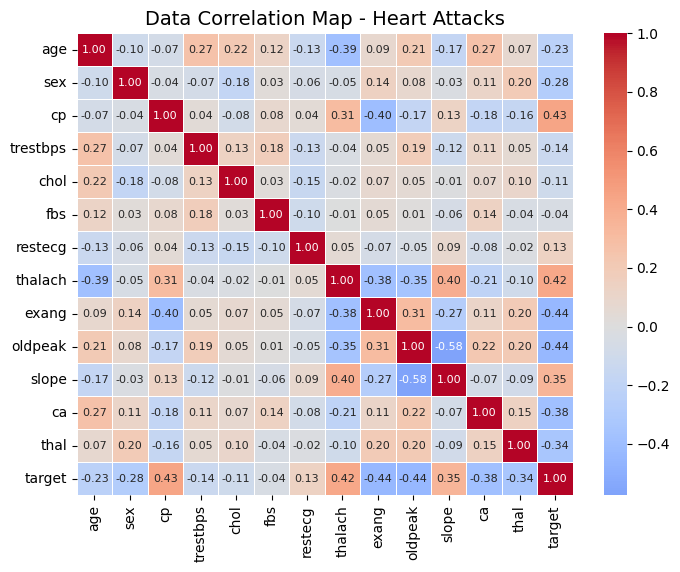

In [14]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_d_log.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Heart Attacks", fontsize=14)
plt.show()

C:\Users\axelr\AppData\Local\Temp\ipykernel_45204\1625872154.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Attribute', palette='viridis')


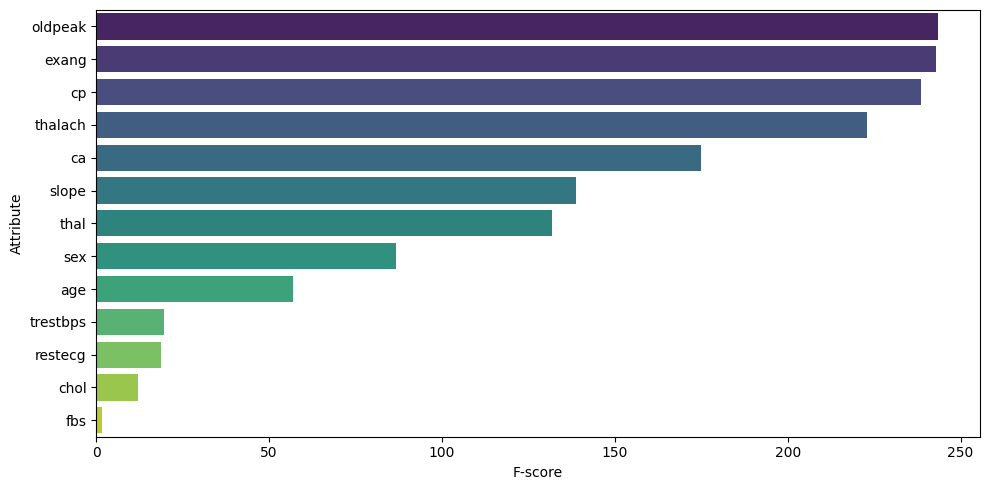

,Attribute,F-score (ANOVA),p-value
9,oldpeak,243.450780,2.141338e-49
8,exang,242.883889,2.694932e-49
2,cp,238.558457,1.563206e-48
7,thalach,222.799538,9.962971e-46
11,ca,174.877078,5.699148e-37
10,slope,138.679393,4.122053e-30
12,thal,131.802996,8.781192e-29
1,sex,86.689707,7.523831e-20
0,age,56.785135,1.067722e-13
3,trestbps,19.494999,1.115807e-05


In [15]:
X = df_heart_d_log.drop(columns=['target'])
y = df_heart_d_log['target']

# Apply SelectKBest with ANOVA F-score
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Results in DataFrame
anova_scores = pd.DataFrame({
    'Attribute': X.columns,
    'F-score (ANOVA)': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-score (ANOVA)', ascending=False)

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Attribute', palette='viridis')
#plt.title('Attribute Importance According to ANOVA F-score')
plt.xlabel('F-score')
plt.ylabel('Attribute')
plt.tight_layout()
plt.show()

anova_scores

----------------------------------------------
Selection of the Most Relevant Attributes
----------------------------------------------
----------------------------------------------

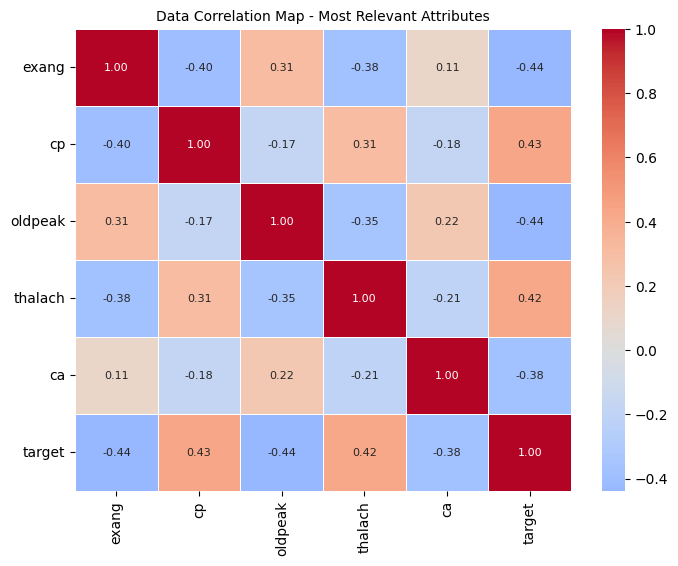

In [16]:
relevant_attribute = ['exang', 'cp', 'oldpeak', 'thalach', 'ca','target']
df_heart_d_log_filt = df_heart_d_log[relevant_attribute]

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_d_log_filt.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Most Relevant Attributes", fontsize=10)
plt.show()

----------------------------------------------
Dataset splitting and data normalization
----------------------------------------------
----------------------------------------------

In [17]:
attribute = 'target'
X = df_heart_d_log_filt.drop(columns=[attribute])
Y = df_heart_d_log_filt.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=16)
print(X)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("Split and normalized dataset")

joblib.dump(scaler, 'model_standardscaler.pkl')
print("Modelo exportado correctamente.")

      exang  cp  oldpeak  thalach  ca
0         0   0      1.0      168   2
1         1   0      3.1      155   0
2         1   0      2.6      125   0
3         0   0      0.0      161   1
4         0   0      1.9      106   3
...     ...  ..      ...      ...  ..
1020      1   1      0.0      164   0
1021      1   0      2.8      141   1
1022      1   0      1.0      118   1
1023      0   0      0.0      159   0
1024      0   0      1.4      113   1

[1025 rows x 5 columns]
Split and normalized dataset
Modelo exportado correctamente.


----------------------------------------------
Hyperparameter Tuning
----------------------------------------------
----------------------------------------------

In [18]:
# Grid Search
# Logistic Regression Model
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controls the penalty applied to coefficient sizes; higher values mean less regularization
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms for logistic regression
    'max_iter': [100, 200, 300, 500, 1000],  # Maximum number of iterations for convergence
    'class_weight': [None, 'balanced'],  # Handling imbalanced classes
    'penalty': ['l2']  # Type of regularization to apply; l2 is Ridge regularization
}

grid_log = GridSearchCV(
    LogisticRegression(max_iter=1000),  # Base model for Logistic Regression
    param_grid=param_grid_log,  # Hyperparameters to evaluate
    scoring='accuracy',  # Metric to use for evaluating model performance
    cv=10,  # Number of folds for cross-validation (10 folds)
    n_jobs=-1,  # Use all available cores for processing
    verbose=1  # Show GridSearch progress
)

print("Grid Search: Logistic Regression")
grid_log.fit(X_train_norm, Y_train)
print("Best parameters:", grid_log.best_params_)
print("Best score:", grid_log.best_score_)  # Ensure the best score is printed
best_log_model_grid = grid_log.best_estimator_
joblib.dump(best_log_model_grid, 'best_log_model_grid.pkl')
print("Model exported.")

# Naive Bayes Model
param_grid_naive = {
    'var_smoothing': list(np.logspace(-15, -5, 15)) + list(np.logspace(-11, -5, 10)) + [1e-9, 1e-8, 1e-7, 1e-6],  # Variance smoothing
    'priors': [None, [0.3, 0.7], [0.5, 0.5]]  # Example for binary classification
}

grid_search_naive = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_naive,
    n_jobs=-1,
    scoring='accuracy',
    cv=10,  # Ensure 10 folds
)

print("\nGrid Search: Naive Bayes")
grid_search_naive.fit(X_train_norm, Y_train)
print("Best hyperparameters:", grid_search_naive.best_params_)
print("Best score:", grid_search_naive.best_score_)
best_naive_model_grid = grid_search_naive.best_estimator_
joblib.dump(best_naive_model_grid, 'best_naive_model_grid.pkl')
print("Model exported.")

# KNN Model
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 21, 23, 25, 27, 29, 31],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function (uniform or distance-based)
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming', 'braycurtis']  # Distance metrics
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    n_jobs=-1,
    cv=10,  # 10 folds
)
print("\nGrid Search: KNN")
grid_search_knn.fit(X_train_norm, Y_train)
print("Best hyperparameters:", grid_search_knn.best_params_)
print("Best score:", grid_search_knn.best_score_)
best_knn_model_grid = grid_search_knn.best_estimator_
joblib.dump(best_knn_model_grid, 'best_knn_model_grid.pkl')
print("Model exported.")

# SVM Model
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Parameter for RBF kernel
    'degree': [3, 4, 5],  # Only applies if kernel = 'poly'
    'class_weight': [None, 'balanced']
}

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=10, n_jobs=-1, scoring='accuracy')  # 10 folds
grid_search_svm.fit(X_train_norm, Y_train)
print("\nGrid Search: SVM")
print("Best hyperparameters:", grid_search_svm.best_params_)
print("Best score:", grid_search_svm.best_score_)
best_svm_model_grid = grid_search_svm.best_estimator_
joblib.dump(best_svm_model_grid, 'best_svm_model_grid.pkl')
print("Model exported.")

# Decision Tree Model
param_grid_tree = {
    'max_depth': [2, 3, 4, 5, 10, 20, None],  # Maximum tree depth
    'min_samples_split': [2, 3, 4, 5, 6, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],  # Minimum samples per leaf
    'max_features': [None, 'sqrt', 'log2'],  # Maximum features to consider at each split
    'criterion': ['gini', 'entropy'],  # Criterion to split nodes
    'class_weight': [None, 'balanced'],  # For handling imbalanced classes
    'splitter': ['best', 'random'],
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, cv=10, n_jobs=-1, scoring='accuracy')  # 10 folds
grid_search_tree.fit(X_train_norm, Y_train)
print("\nGrid Search: Decision Trees")
print("Best hyperparameters:", grid_search_tree.best_params_)
print("Best score:", grid_search_tree.best_score_)
best_tree_model_grid = grid_search_tree.best_estimator_
joblib.dump(best_tree_model_grid, 'best_tree_model_grid.pkl')
print("Model exported.")

# Multilayer Perceptron Model
param_grid_mlp = {
    'hidden_layer_sizes': [(10), (50), (100), (10, 50), (50, 100), (100, 50), (50, 50), (10, 10, 10), (150, 75)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant', 'adaptive']
}

grid_mlp = GridSearchCV(
    MLPClassifier(max_iter=1000),  # Base model for MLP
    param_grid=param_grid_mlp,  # Hyperparameters to evaluate
    scoring='accuracy',  # Metric to use for evaluating model performance
    cv=10,  # Number of folds for cross-validation (10 folds)
    n_jobs=-1,  # Use all available cores for processing
    verbose=1  # Show GridSearch progress
)

print("\nGrid Search: MLP")
grid_mlp.fit(X_train_norm, Y_train)
print("Best parameters:", grid_mlp.best_params_)
print("Best score:", grid_mlp.best_score_)  # Ensure the best score is printed
best_mlp_model_grid = grid_mlp.best_estimator_
joblib.dump(best_mlp_model_grid, 'best_mlp_model_grid.pkl')
print("Model exported.")

Grid Search: Logistic Regression
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.8378048780487806
Model exported.

Grid Search: Naive Bayes
Best hyperparameters: {'priors': [0.5, 0.5], 'var_smoothing': np.float64(1e-15)}
Best score: 0.802439024390244
Model exported.

Grid Search: KNN
Best hyperparameters: {'metric': 'chebyshev', 'n_neighbors': 25, 'weights': 'distance'}
Best score: 0.9939024390243902
Model exported.

Grid Search: SVM
Best hyperparameters: {'C': 100, 'class_weight': None, 'degree': 5, 'gamma': 1, 'kernel': 'poly'}
Best score: 0.9646341463414636
Model exported.

Grid Search: Decision Trees
Best hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score: 0.9926829268292684
Model exported.

Grid Search: MLP
Fitti

----------------------------------------------
Results with test data
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.775610   0.777553  0.775610  0.775396
Naive Bayes          0.770732   0.770725  0.770732  0.770710
KNN                  0.975610   0.975652  0.975610  0.975607
SVM                  0.951220   0.951378  0.951220  0.951208
Decision Tree        0.975610   0.975652  0.975610  0.975607
MLP                  0.946341   0.946392  0.946341  0.946344


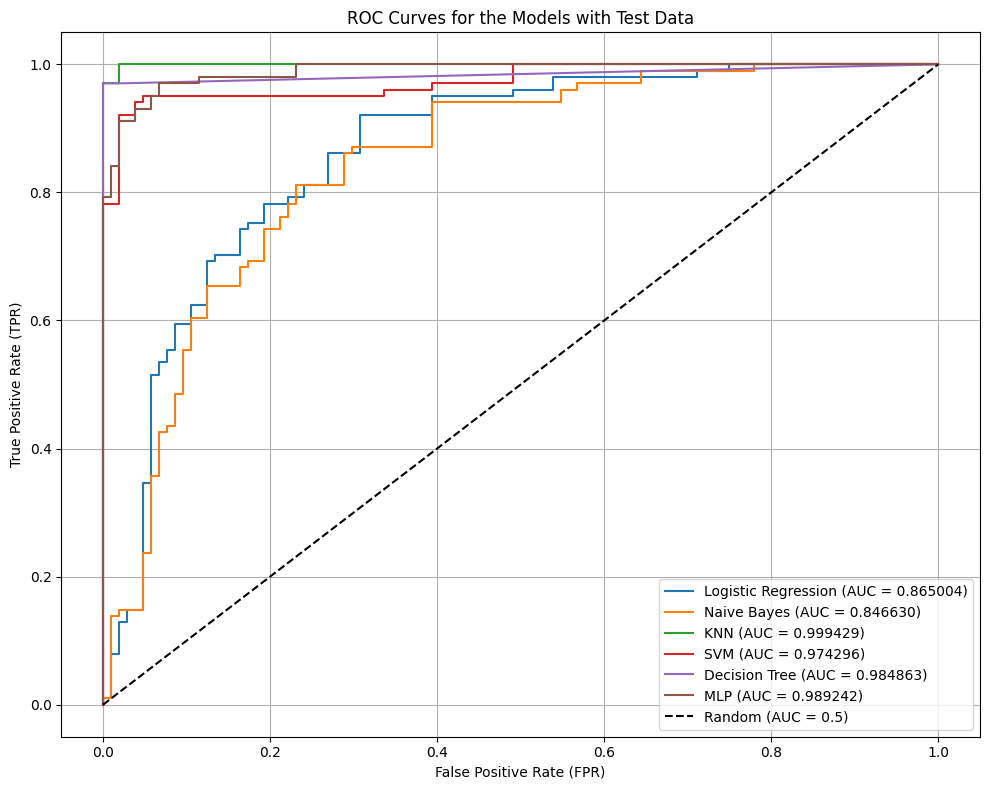

In [20]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Dictionary with the models to evaluate
#models = {
#    "Regresión Logística": best_log_model_grid,
#    "Naive Bayes": best_naive_model_grid,
#    "KNN": best_knn_model_grid,
#    "Árbol de Decisión": best_tree_model_grid,
#    "MLP": best_mlp_model_grid,
#    "SVM": best_svm_model_grid
#}

# Dictionary with the models to evaluate
models = {
    "Logistic Regression": joblib.load("best_log_model_grid.pkl"),
    "Naive Bayes": joblib.load("best_naive_model_grid.pkl"),
    "KNN": joblib.load("best_knn_model_grid.pkl"),
    "SVM": joblib.load("best_svm_model_grid.pkl"),
    "Decision Tree": joblib.load("best_tree_model_grid.pkl"),
    "MLP": joblib.load("best_mlp_model_grid.pkl")
}

# Create a dictionary to store metrics
metrics = {}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test_norm)

    # Save metrics
    metrics[name] = {
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred, average='weighted'),
        "Recall": recall_score(Y_test, y_pred, average='weighted'),
        "F1-score": f1_score(Y_test, y_pred, average='weighted')
    }

# Display metrics in table format
df_metrics = pd.DataFrame(metrics).T
print(df_metrics)

# ROC curves

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_norm)[:, 1]
    else:
        y_scores = model.decision_function(X_test_norm)

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.6f})")

# Random curve
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.title('ROC Curves for the Models with Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------------------
Results with train data
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.836585   0.811563  0.891765  0.849776
Naive Bayes          0.806098   0.798206  0.837647  0.817451
KNN                  0.997561   0.995316  1.000000  0.997653
SVM                  0.979268   0.974419  0.985882  0.980117
Decision Tree        0.997561   0.995316  1.000000  0.997653
MLP                  0.963415   0.954023  0.976471  0.965116


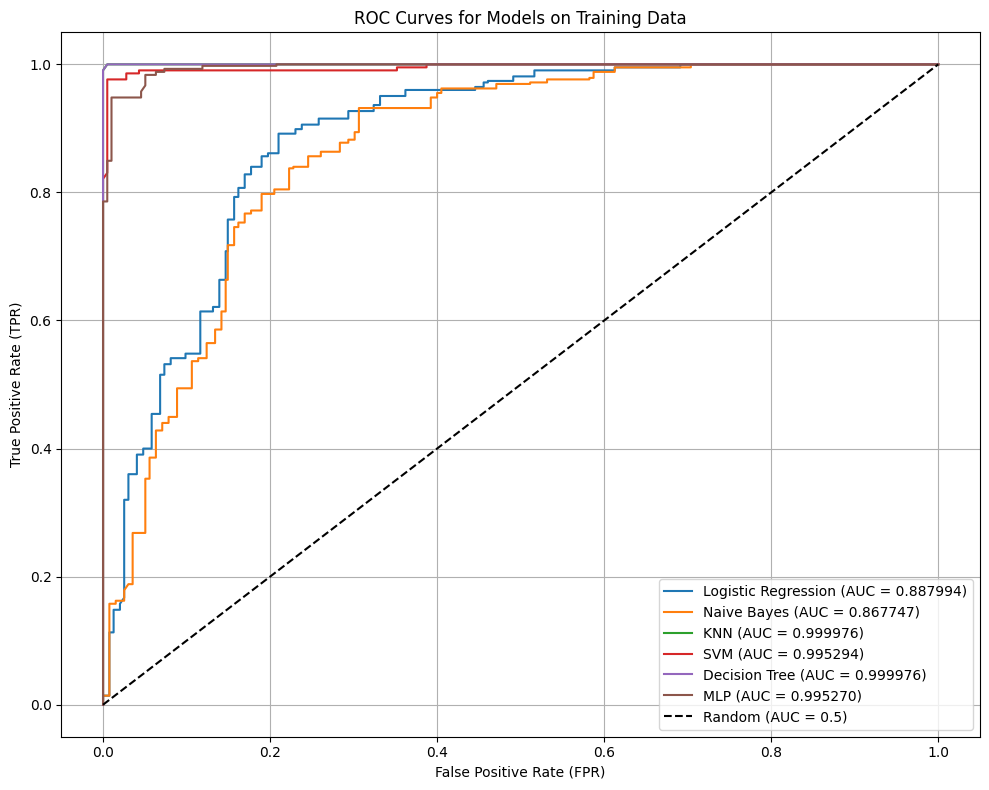

In [22]:
# Create a dictionary to store training metrics
training_metrics = {}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_train_norm)

    # Save metrics
    training_metrics[name] = {
        "Accuracy": accuracy_score(Y_train, y_pred),
        "Precision": precision_score(Y_train, y_pred),
        "Recall": recall_score(Y_train, y_pred),
        "F1-score": f1_score(Y_train, y_pred)
    }

# Display metrics in table format
df_training_metrics = pd.DataFrame(training_metrics).T
print(df_training_metrics)

# ROC curves

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_train_norm)[:, 1]
    else:
        y_scores = model.decision_function(X_train_norm)

    fpr, tpr, _ = roc_curve(Y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.6f})")  # showing 5 decimal places

# Random curve
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.title('ROC Curves for Models on Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------------------
Ensemble Results (test data)
----------------------------------------------
----------------------------------------------


=== Evaluating XGB on TEST set ===
              precision    recall  f1-score   support

         0.0   0.971963  1.000000  0.985782       104
         1.0   1.000000  0.970297  0.984925       101

    accuracy                       0.985366       205
   macro avg   0.985981  0.985149  0.985353       205
weighted avg   0.985776  0.985366  0.985360       205



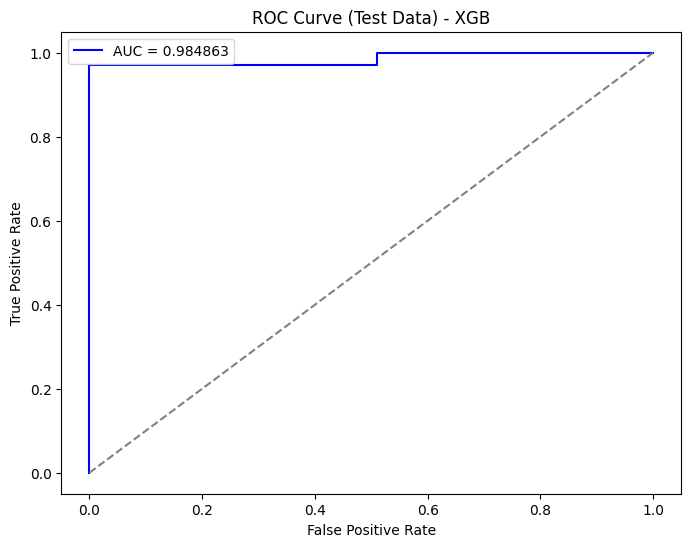


=== Evaluating DecisionTree on TEST set ===
              precision    recall  f1-score   support

         0.0   0.971963  1.000000  0.985782       104
         1.0   1.000000  0.970297  0.984925       101

    accuracy                       0.985366       205
   macro avg   0.985981  0.985149  0.985353       205
weighted avg   0.985776  0.985366  0.985360       205



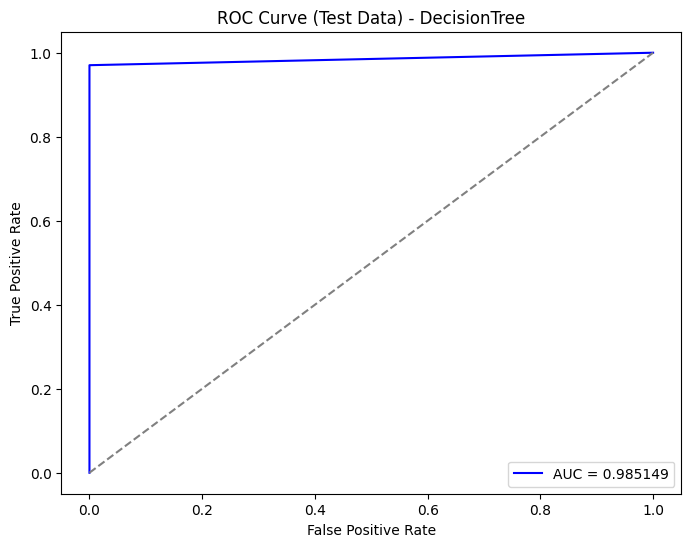


=== Evaluating LogisticRegression on TEST set ===
              precision    recall  f1-score   support

         0.0   0.971429  0.980769  0.976077       104
         1.0   0.980000  0.970297  0.975124       101

    accuracy                       0.975610       205
   macro avg   0.975714  0.975533  0.975600       205
weighted avg   0.975652  0.975610  0.975607       205



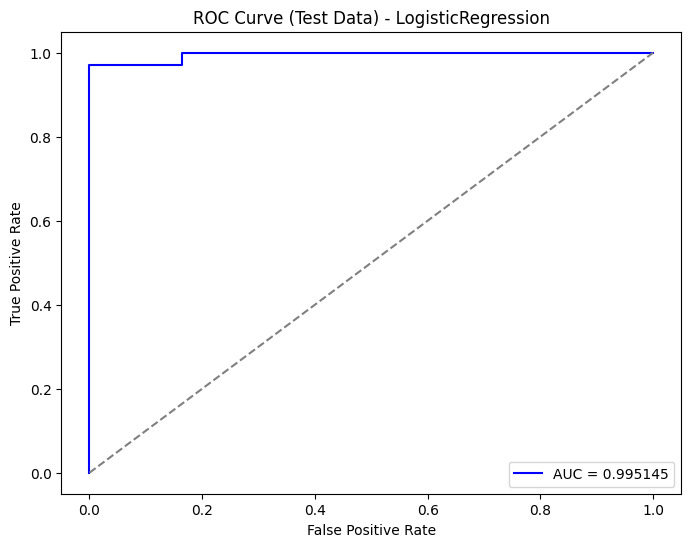


=== Evaluating RandomForest on TEST set ===
              precision    recall  f1-score   support

         0.0   0.944444  0.980769  0.962264       104
         1.0   0.979381  0.940594  0.959596       101

    accuracy                       0.960976       205
   macro avg   0.961913  0.960682  0.960930       205
weighted avg   0.961657  0.960976  0.960950       205



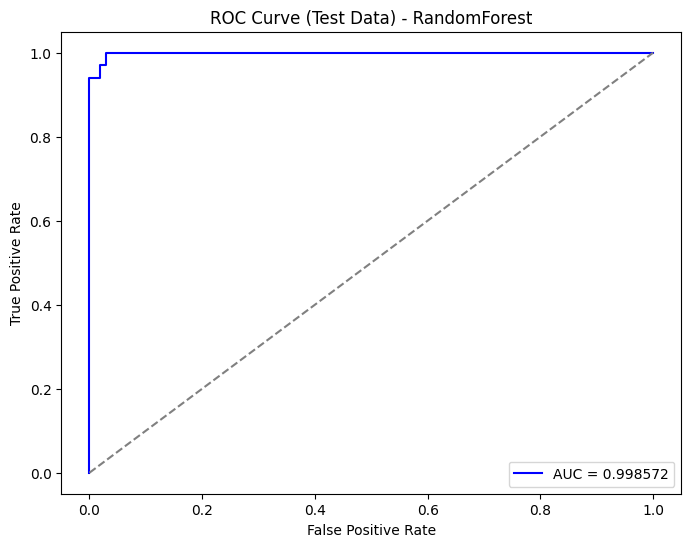


=== Evaluating GradientBoosting on TEST set ===
              precision    recall  f1-score   support

         0.0   0.971429  0.980769  0.976077       104
         1.0   0.980000  0.970297  0.975124       101

    accuracy                       0.975610       205
   macro avg   0.975714  0.975533  0.975600       205
weighted avg   0.975652  0.975610  0.975607       205



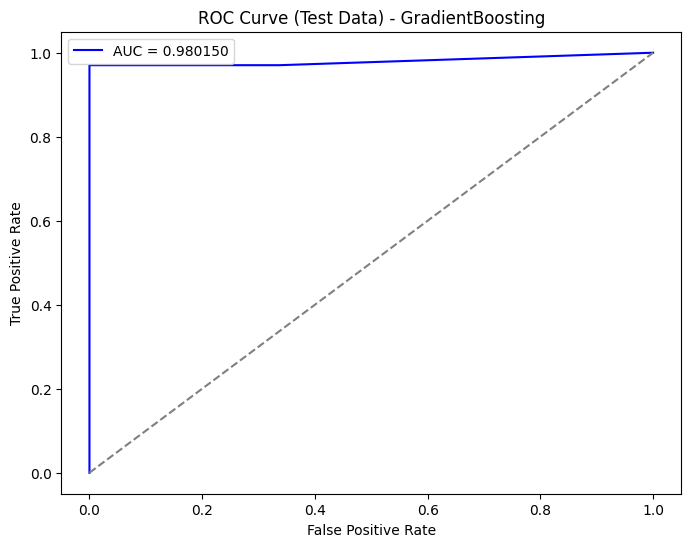


=== Evaluating VotingSoft on TEST set ===


c:\Users\axelr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


              precision    recall  f1-score   support

         0.0   0.971429  0.980769  0.976077       104
         1.0   0.980000  0.970297  0.975124       101

    accuracy                       0.975610       205
   macro avg   0.975714  0.975533  0.975600       205
weighted avg   0.975652  0.975610  0.975607       205



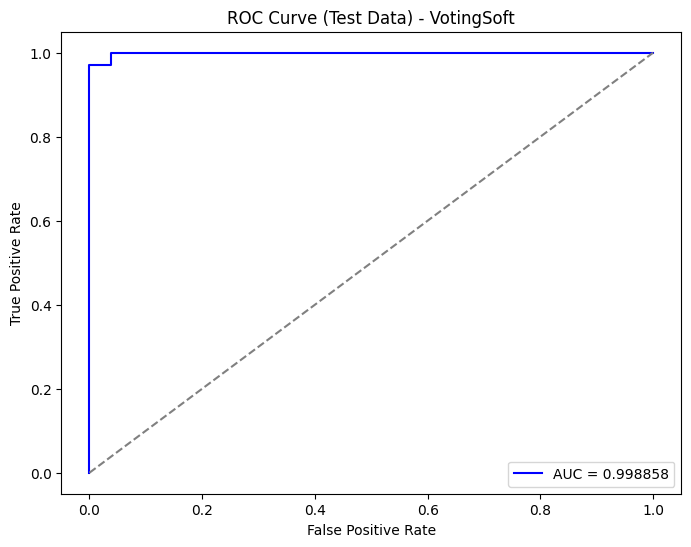

In [23]:
base_models = [
    #('Regresion logistica', LogisticRegression(C = 0.1, class_weight = None, max_iter = 100, penalty = 'l2', solver = 'liblinear')),
    #('KNN', KNeighborsClassifier( metric = 'chebyshev', n_neighbors = 25, weights = 'distance')),
    ('KNN', KNeighborsClassifier( metric = 'chebyshev', n_neighbors = 25, weights = 'distance')),
    ('SVM', SVC(C = 100, class_weight = None, degree = 5, gamma = 1, kernel = 'poly', probability=True)),
    ('Arboles de decision', DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 20, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')),
    ('Perceptron multicapa', MLPClassifier(max_iter = 1000, activation = 'tanh', alpha = 0.001, hidden_layer_sizes = (150, 75), learning_rate = 'adaptive', solver = 'adam'))
]

meta_models = {
    'XGB': XGBClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'VotingSoft': VotingClassifier(estimators=base_models, voting='soft')
}

for name, meta_model in meta_models.items():
    if 'Voting' in name:
        model = meta_model
    else:
        model = StackingClassifier(cv=10, n_jobs=-1, estimators=base_models, final_estimator=meta_model, passthrough=True)
    
    print(f"\n=== Evaluating {name} on TEST set ===")
    model.fit(X_train_norm, Y_train)
    
    y_pred = model.predict(X_test_norm)
    print(classification_report(Y_test, y_pred, digits=6))
    
    y_proba = model.predict_proba(X_test_norm)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.6f}", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (Test Data) - {name}")
    plt.legend()
    plt.show()
    
    # Optional: Save model
    joblib.dump(model, f'ensemble_{name}_dataset1.pkl')

----------------------------------------------
Ensemble Results (train data)
----------------------------------------------
----------------------------------------------


=== Evaluating XGB on TRAIN set ===
              precision    recall  f1-score   support

         0.0   0.989975  1.000000  0.994962       395
         1.0   1.000000  0.990588  0.995272       425

    accuracy                       0.995122       820
   macro avg   0.994987  0.995294  0.995117       820
weighted avg   0.995171  0.995122  0.995123       820



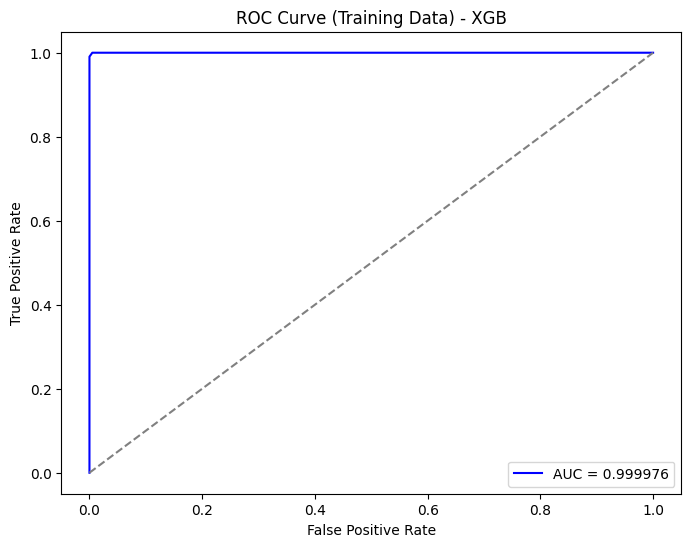


=== Evaluating DecisionTree on TRAIN set ===
              precision    recall  f1-score   support

         0.0   0.989975  1.000000  0.994962       395
         1.0   1.000000  0.990588  0.995272       425

    accuracy                       0.995122       820
   macro avg   0.994987  0.995294  0.995117       820
weighted avg   0.995171  0.995122  0.995123       820



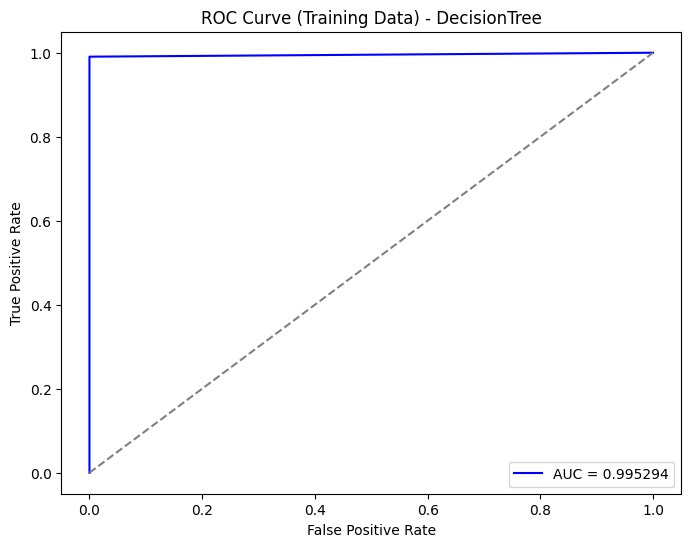


=== Evaluating LogisticRegression on TRAIN set ===
              precision    recall  f1-score   support

         0.0   1.000000  0.994937  0.997462       395
         1.0   0.995316  1.000000  0.997653       425

    accuracy                       0.997561       820
   macro avg   0.997658  0.997468  0.997557       820
weighted avg   0.997572  0.997561  0.997561       820



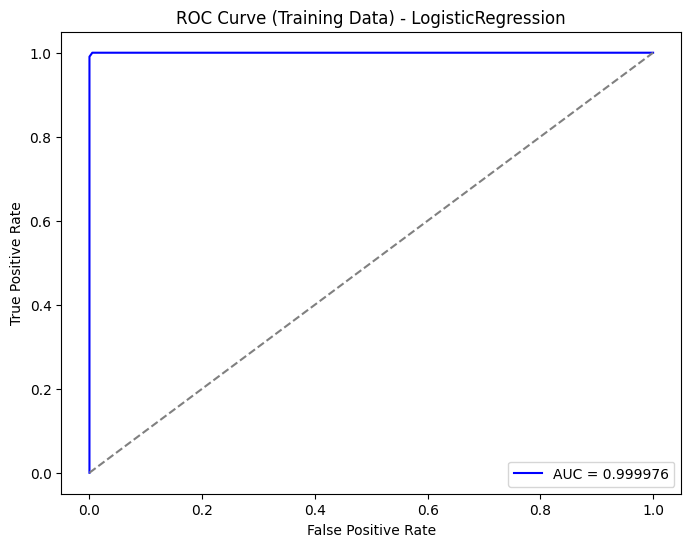


=== Evaluating RandomForest on TRAIN set ===
              precision    recall  f1-score   support

         0.0   1.000000  0.994937  0.997462       395
         1.0   0.995316  1.000000  0.997653       425

    accuracy                       0.997561       820
   macro avg   0.997658  0.997468  0.997557       820
weighted avg   0.997572  0.997561  0.997561       820



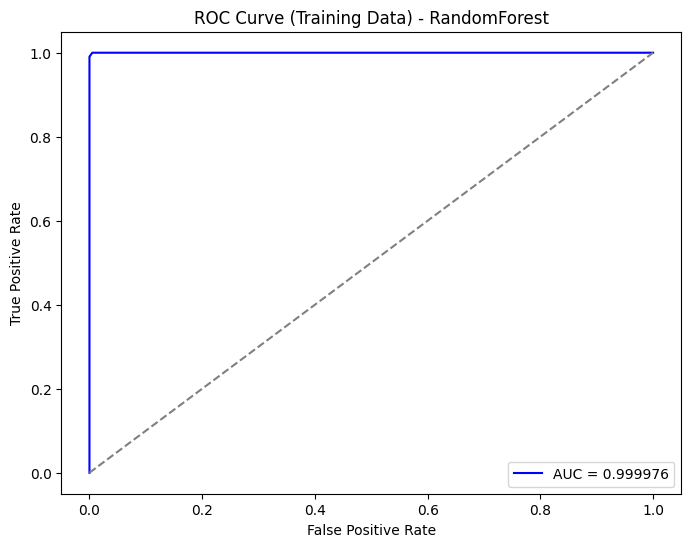


=== Evaluating GradientBoosting on TRAIN set ===
              precision    recall  f1-score   support

         0.0   1.000000  0.994937  0.997462       395
         1.0   0.995316  1.000000  0.997653       425

    accuracy                       0.997561       820
   macro avg   0.997658  0.997468  0.997557       820
weighted avg   0.997572  0.997561  0.997561       820



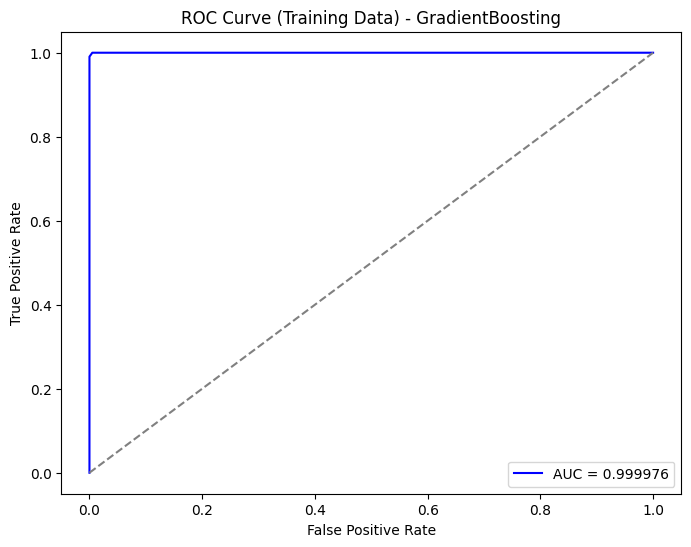


=== Evaluating VotingSoft on TRAIN set ===


c:\Users\axelr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


              precision    recall  f1-score   support

         0.0   1.000000  0.994937  0.997462       395
         1.0   0.995316  1.000000  0.997653       425

    accuracy                       0.997561       820
   macro avg   0.997658  0.997468  0.997557       820
weighted avg   0.997572  0.997561  0.997561       820



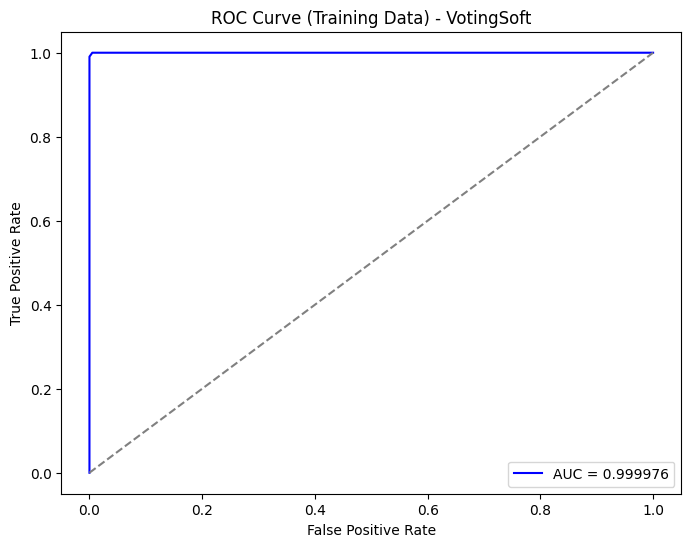

In [25]:
for name, meta_model in meta_models.items():
    if 'Voting' in name:
        model = meta_model
    else:
        model = StackingClassifier(cv=10, n_jobs=-1, estimators=base_models, final_estimator=meta_model, passthrough=True)
    
    print(f"\n=== Evaluating {name} on TRAIN set ===")
    model.fit(X_train_norm, Y_train)
    
    y_pred_train = model.predict(X_train_norm)
    print(classification_report(Y_train, y_pred_train, digits=6))
    
    y_proba_train = model.predict_proba(X_train_norm)[:, 1]
    fpr, tpr, _ = roc_curve(Y_train, y_proba_train)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.6f}", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (Training Data) - {name}")
    plt.legend()
    plt.show()